In [35]:
import numpy as np
import train as train #PA6 methods
import neuralnetworks as nn
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.figure
import copy

# CS440 Project

*December, 2017*

## Introduction

## Methods

### Data Collection

The first step of the project was collecting all the neccessary data needed to train the neural networks. For this task we used Beautiful Soup to scrape data from https://www.sports-reference.com. In order to train a neural network to predict the final overall score of an NCAA basketball game we needed data for individual game scores as well as season statistics for teams, which serve as the input data. The main purpose of the neural network is to make these predictions for future games in the NCAA Tournament so game data was scraped for every game played per year by Tournament teams from 1996 to 2017. There are 64 NCAA Tournament teams per year and each team will play 30-35 games, however, many of these games are played against other Tournament teams, so the game data consists of between 1700 to 1900 games per year. Next, team season statistics were scraped for every team that appears in our game data for that year. These stats consist of games played (G), minutes played (MP), field goals (FG), field goal attempts (FGA), field goal percentage (FG%), 2 point shots made (2P), 2 point shots attempted (2PA), 2 point shot percentage (2P%), 3 point shots made (3P), 3 point shots attempted (3PA), 3 point shot percentage (3P%), free throws made (FT), free throws attempted (FTA), free throw percentage (FT%), offensive rebounds (ORB), defensive rebounds (DRB), total rebounds (TRB), assists (AST), steals (STL), blocks (BLK), turnovers (TOV), personal fouls (PF), points (PTS), points per game (PTS/G) for the each team as well as the same set of stats for opponent teams when playing that particular team. Along with the data for the 64 Tournament teams, data was collected for the 240-290 unique teams that they played that season. It took several hours for our scraping algorithms to run and collect all the required data. After scraping all the data was complete, we reviewed the collected data to ensure there were no abnormalities. We found that team statistics before 2010 were consistently missing stats from the team's opponent data. These missing valuse were noted, and as a result input data will have to be chosen more selectively when training the neural network with data before 2010. We used pickle to store the data for later use.

In [13]:
import pickle

teamYearData = {} #dictionary with year as key and value is a list of lists containing [team1,team2,overall score] for everygame played by tournament teams
#example: '2000': [['Duke', 'Lamar', 137], ['Kansas', 'DePaul', 158]]
pickle_in = open("teamYearData.pickle","rb")
teamYearData = pickle.load(pickle_in)

tournamentGameData = {} #dictionary with year as key and value is a list of lists containing [team1,team2,overall score] for everygame in the tournament
#example: '2000': [['Duke', 'Lamar', 137], ['Kansas', 'DePaul', 158]]
pickle_in = open("tournamentGameData.pickle","rb")
tournamentGameData = pickle.load(pickle_in)

gameYearData = {} #dictionary with year as key and value is a dictionary with team as key and value in the form of [[team stats],[opponent stats]] 
#team/oppenent stats: [G, MP, FG, FGA, FG%, 2P, 2PA, 2P%, 3P, 3PA, 3P%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS, PTS/G]
#example: '2000': {'Duke': [[34, '', 1045, 2172, 0.481, 761, 1430, 0.532, 284, 742, 0.383, 618, 833, 0.742, 453, 860, 1313, 584, 333, 191, 480, 552, 2992, 88.0], [34, '', 934, 2238, 0.417, 737, 1686, 0.437, 197, 552, 0.357, 360, 537, 0.67, 526, 757, 1283, 472, 240, 123, 607, 690, 2425, 71.3]]}
pickle_in = open("gameYearData.pickle","rb")
gameYearData = pickle.load(pickle_in)

### Data Formatting and Selection

To make the data useable for the neural network, we defined a function that outputs a training matrix in the form:  
[[team 1 season statistics, team 2 season statistics, final overall score of game played],  
[team 1 season statistics, team 2 season statistics, final overall score of game played],...]  
The number of columns is determined by which stats we choose as input data and the last column, final overall score, is the target data. The number of rows is the number of games that are being used as input data. The function also takes a year range and which stats to include as inputs to ease the process of data selection and testing.

Next, we discussed which data should be used to train the neural networks to best predict the overall score of future games. The data from 2010 to 2017 was chosen to use as test data because every team has all the team statistics, both their team and opponent's stats, that we thought were relevent to the final score. College basketball has also recently gone through some rule changes that have effected scoring, such as the shot clock being reduced to 30 seconds, so we thought this data in this year range would be better suited to predict outcomes for future games. The statistics that were chosen for each team are [FG, FGA, FG%, 2P, 2PA, 2P%, 3P, 3PA, 3P%, FT, FTA, FT%, TRB, AST, TOV, PTS/G] for both their team and opponent team data. For comparison, another training matrix was made from all the game data collected from 1996 to 2017, with the stats [FG, FGA, FG%, 2P, 2PA, 2P%, 3P, 3PA, 3P%, FT, FTA, FT%, TRB, AST, PTS/G] for the team data, but only using PTS/G for the opponent data. The data from 2010 to 2017 contains data for 15,216 games and has 36 stats per team, for a total for 72 input variables. The data from 1996 to 2017 contains data for 40,126 games, but only has 18 stats per team, for a total for 36 input variables. 

We used two different methods to test the effectiveness of the trained neural networks. This was done with use of a modified version of the trainNNs function defined in PA6, which trains neural networks with different structures, then tests and compares the average errors of predicted values versus actual values. For the first method we trained the neural networks with all games in the data matrix through the 2016 season and the regular season of 2017 and use the NCAA Tournament games from the 2017 season as testing data. This is done to simulate how the neural network will actually be used and this simulation is also the result that would have been achieved if this project was done a year ago. For the other method we train the neural network with 80% of games from the data matrix as training data and with the remaining 20% of games as testing data. This is used to check how well the neural networks can predict general data.

## Results

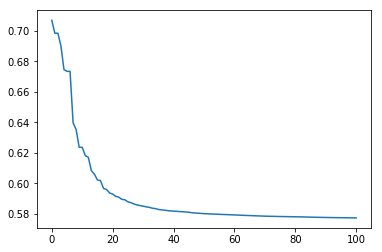

In [43]:
nnet = nn.NeuralNetwork(trainXdata.shape[1], [3,3,3,3], trainTdata.shape[1])
nnet.train(trainXdata, trainTdata, 100)
plt.plot(nnet.getErrorTrace())

Plots showed that error converages quickly for this data and is no longer decreasing after 100 iterations, so 100 iterations was chosen for training.  
Tests run with:

In [32]:
iterations = 100
repetitions = 10

After extensively testing many different neural network structures on the two data sets, we found that structures with higher node counts very quickly overfit the model to the testing data and were not adequate for predicting future data. As a result, neural networks were tested with structures with lower node counts, as well as, a structure with no hidden layers. The neural network with no hidden layers that was trained with the 2010-2017 data consistently outperformed the neural networks trained with the other structures and the other data set at predicting the outcomes of the 2017 NCAA Tournament games, with an average error of 14.74 points per game. The same neural network was also one of the best for generally predicting new data with an average error of 15.96 points per game. A neural network with no hidden layers is an adequate model because it will not overfit the data and is very good at predicting future outcomes, assuming the the data has linear properties. The fact that the neural network with no hidden layers preformed the best suggests that the data is linearly separable. Neural networks with no hidden layers also have the advantage of training faster than any of structure. As a result, the neural network with no hidden layers is the best for predicting the final overall score of future games.  

An error of 14.74 points per game seems to be relatively high, but we believe it is a fairly good estimate due to the high variance and unpredictability of individual games. Teams can play each other multiple times and end with different scores, resulting in sets of the same input data with different target data, increasing the variablility of the data.  

As we predicted, the data set with game data from 2010-2017 outperformed the data set with all the the game data we collected. We believe this is a result of games before 2010, especially games in the 90's, not being reflective of how college basketball is played today, due to rule changes and the increase of one and done players. This can also be attributed to the fact that the data set with game data from 2010-2017 has twice as many input variables per team because data collection has been much more complete is the recent years.

#### Training neural network with all games from the 2010-2016 seasons and the regular season of 2017 as training data and with all tournament games from the 2017 NCAA Tournament as testing data

0 done
[0, 15.899624842295699, 14.746068949636012, 4.641751050949097]


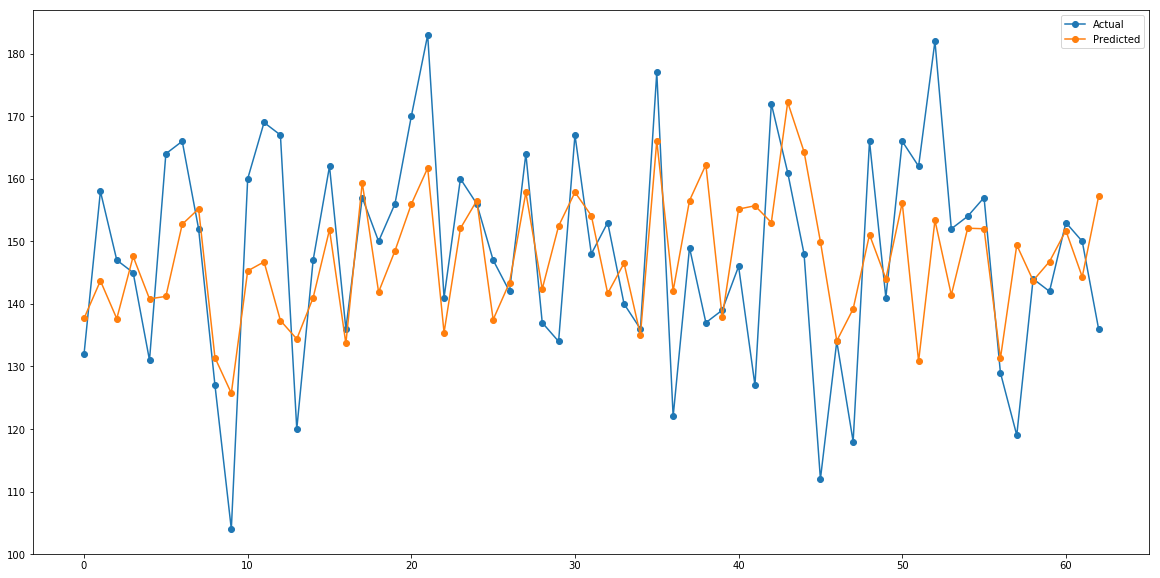

In [39]:
results = train.trainNNsWithTrainData(trainXdata, trainTdata, testXdata,testTdata, [0], repetitions, iterations)
summary = train.summarize(results)
best = train.bestNetwork(summary)
print(best)

nnet = nn.NeuralNetwork(trainXdata.shape[1], best[0], trainTdata.shape[1])
nnet.train(trainXdata, trainTdata, nIterations=iterations)
YtestData = nnet.use(testXdata)

plt.figure(figsize=(20,10))
plt.plot(testTdata[:,0],'o-',label="Actual")
plt.plot(YtestData[:,0],'o-',label="Predicted")
plt.legend()

#### Training neural network with 80% of games from the 2010-2017 seasons as training data and with the remaining 20% as testing data

0 done
[0, 15.890157779576432, 15.957346012932877, 3.5050148963928223]


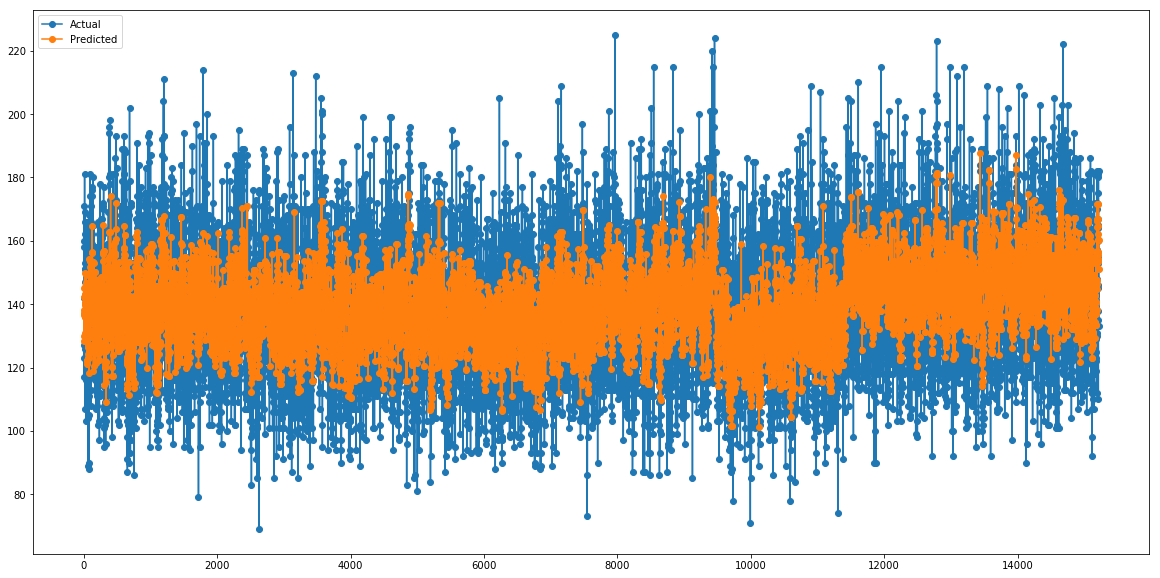

In [40]:
results = train.trainNNs(trainAllXdata, trainAllTdata, .8, [0], repetitions, iterations)
summary = train.summarize(results)
best = train.bestNetwork(summary)
print(best)

nnet = nn.NeuralNetwork(trainAllXdata.shape[1], best[0], trainAllTdata.shape[1])
nnet.train(trainAllXdata, trainAllTdata, nIterations=iterations)
YtestData = nnet.use(trainAllXdata)

plt.figure(figsize=(20,10))
plt.plot(trainAllTdata[:,0],'o-',label="Actual")
plt.plot(YtestData[:,0],'o-',label="Predicted")
plt.legend()

## Conclusions

### References

* [chuck]

In [48]:
import io
from nbformat import current
import glob
nbfile = glob.glob('project_writeup.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

Word count for file project_writeup.ipynb is 1312
